In [1]:
## Import the necessary libraries

In [2]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("MLJ")
Pkg.add("MLJBase")
Pkg.add("DecisionTree")

   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`


In [3]:
Pkg.add("CSV")

   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`


In [4]:
## import and read the dataset
using CSV
using DataFrames

data_set = CSV.read("fish_data.csv", DataFrame)
first(data_set, 5)

5×4 DataFrame
 Row │ species             length   weight   w_l_ratio 
     │ String31            Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────
   1 │ Anabas testudineus    10.66     3.45       0.32
   2 │ Anabas testudineus     6.91     3.27       0.47
   3 │ Anabas testudineus     8.38     3.46       0.41
   4 │ Anabas testudineus     7.57     3.36       0.44
   5 │ Anabas testudineus    10.83     3.38       0.31

In [5]:
## Split the whole dataset into training set and testing set

In [6]:
using MLJBase

training_set, testing_set = partition(data_set,0.8, shuffle=false)
first(training_set,5)

5×4 DataFrame
 Row │ species             length   weight   w_l_ratio 
     │ String31            Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────
   1 │ Anabas testudineus    10.66     3.45       0.32
   2 │ Anabas testudineus     6.91     3.27       0.47
   3 │ Anabas testudineus     8.38     3.46       0.41
   4 │ Anabas testudineus     7.57     3.36       0.44
   5 │ Anabas testudineus    10.83     3.38       0.31

In [7]:
first(testing_set,5)

5×4 DataFrame
 Row │ species         length   weight   w_l_ratio 
     │ String31        Float64  Float64  Float64   
─────┼─────────────────────────────────────────────
   1 │ Setipinna taty    17.17     3.05       0.18
   2 │ Setipinna taty    19.1      2.97       0.16
   3 │ Setipinna taty    17.8      3.22       0.18
   4 │ Setipinna taty    18.11     3.17       0.18
   5 │ Setipinna taty    17.5      3.17       0.18

## Explotary Data Analysis (EDA)

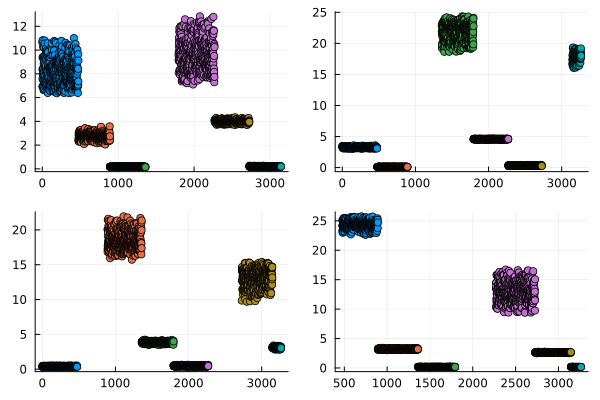

In [8]:
using StatsPlots

@df training_set scatter(
    [:length, :weight, :w_l_ratio],
    group = :species,
    layout = (2, 2),
    legend = :false
)


In [9]:
## check the null values of the training_set

In [10]:
allowmissing!(training_set)
col_has_missing = map(col->any(ismissing,col), eachcol(data_set))
col_has_missing

4-element Vector{Bool}:
 0
 0
 0
 0

In [11]:
## Verify the dimension of the training_set

In [12]:
println("Total Observations in training_set: ", size(training_set,1))
println("Total Features in training_set: ", size(training_set,2))


Total Observations in training_set: 3264
Total Features in training_set: 4


In [13]:
## Seperate the training_set into the independent variables (x) and dependent variable (y)

In [14]:
X = Matrix(training_set[:,Not(:species)])
first(X,5)

5-element Vector{Union{Missing, Float64}}:
 10.66
  6.91
  8.38
  7.57
 10.83

In [15]:
y= Vector(training_set[:, :species])
first(y,5)

5-element Vector{Union{Missing, String31}}:
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"

In [16]:
using DecisionTree
using Random

In [17]:
## set the random seed for reproducibility
Random.seed!(123)

TaskLocalRNG()

In [18]:
## Create the random permutation of indices

In [19]:
indices = shuffle(1:size(X, 1))
first(indices,5)

5-element Vector{Int64}:
  230
  130
 1439
 3029
 1093

In [20]:
## Define the split ratio

In [21]:
train_ratio = 0.8
train_size = Int(round(train_ratio *size(X,1)))

2611

In [22]:
## Split the indices

In [23]:
train_indices = indices[1:train_size]
test_indices = indices[(train_size + 1):end]

653-element Vector{Int64}:
  542
 3235
  922
 1790
 2986
  990
  607
  136
 3115
  316
  730
 2712
  752
    ⋮
 2268
 1622
 3209
  175
 1974
  805
 1863
 3023
   89
  654
 1998
 1706

In [24]:
## create the training and testing set

In [25]:
X_train = X[train_indices,:]
y_train = y[train_indices]
X_test =X[test_indices,:]
y_test = y[test_indices]

653-element Vector{Union{Missing, String31}}:
 "Coilia dussumieri"
 "Setipinna taty"
 "Otolithoides biauritus"
 "Otolithoides pama"
 "Puntius lateristriga"
 "Otolithoides biauritus"
 "Coilia dussumieri"
 "Anabas testudineus"
 "Puntius lateristriga"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Polynemus paradiseus"
 "Coilia dussumieri"
 ⋮
 "Pethia conchonius"
 "Otolithoides pama"
 "Setipinna taty"
 "Anabas testudineus"
 "Pethia conchonius"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Puntius lateristriga"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Otolithoides pama"

In [26]:
## create the model

In [27]:
model = RandomForestClassifier(n_trees=10)

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [28]:
## fit the model on training data

In [29]:
Pkg.add("ScikitLearn")

   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`


In [30]:
# Create the model
model = DecisionTree.DecisionTreeClassifier(max_depth=4)  # Use = for keyword argument

# Fit the model on the training data
DecisionTree.fit!(model, X_train, y_train)  # Qualify with DecisionTree



DecisionTreeClassifier
max_depth:                4
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  Union{Missing, String31}[String31("Anabas testudineus"), String31("Coilia dussumieri"), String31("Otolithoides biauritus"), String31("Otolithoides pama"), String31("Pethia conchonius"), String31("Polynemus paradiseus"), String31("Puntius lateristriga"), String31("Setipinna taty")]
root:                     Decision Tree
Leaves: 11
Depth:  4

In [31]:
## Display the train and test size

In [32]:
println("Training Set Size: ", size(X_train), " Features: ", length(y_train)," Labels")
println("Testing Set Size: ", size(X_test), " Features: ", length(y_test)," Labels")

Training Set Size: (2611, 3) Features: 2611 Labels
Testing Set Size: (653, 3) Features: 653 Labels


In [33]:
## Make the predictions

In [34]:
y_pred = DecisionTree.predict(model, X_test)

653-element Vector{Union{Missing, String31}}:
 "Coilia dussumieri"
 "Setipinna taty"
 "Otolithoides biauritus"
 "Otolithoides pama"
 "Puntius lateristriga"
 "Otolithoides biauritus"
 "Coilia dussumieri"
 "Anabas testudineus"
 "Puntius lateristriga"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Polynemus paradiseus"
 "Coilia dussumieri"
 ⋮
 "Pethia conchonius"
 "Otolithoides pama"
 "Setipinna taty"
 "Anabas testudineus"
 "Pethia conchonius"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Puntius lateristriga"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Otolithoides pama"

In [35]:
## Check the model accuracy

In [36]:
accuracy = sum(y_pred .== y_test)/length(y_test)
println("Accuracy ", accuracy)

Accuracy 0.9724349157733537


## Explotar Data Analysis for test data

In [52]:
last(testing_set, 50)

50×4 DataFrame
 Row │ species                length   weight   w_l_ratio 
     │ String31               Float64  Float64  Float64   
─────┼────────────────────────────────────────────────────
   1 │ Sillaginopsis panijus    29.79     6.06       0.2
   2 │ Sillaginopsis panijus    30.61     6.11       0.2
   3 │ Sillaginopsis panijus    31.77     6.18       0.19
   4 │ Sillaginopsis panijus    32.38     6.16       0.19
   5 │ Sillaginopsis panijus    28.68     6.05       0.21
   6 │ Sillaginopsis panijus    33.14     6.21       0.19
   7 │ Sillaginopsis panijus    31.17     6.17       0.2
   8 │ Sillaginopsis panijus    32.03     6.19       0.19
   9 │ Sillaginopsis panijus    32.4      6.26       0.19
  10 │ Sillaginopsis panijus    30.03     6.08       0.2
  11 │ Sillaginopsis panijus    29.17     6.05       0.21
  ⋮  │           ⋮               ⋮        ⋮         ⋮
  41 │ Sillaginopsis panijus    30.84     6.14       0.2
  42 │ Sillaginopsis panijus    31.46     6.14       0.2
  43 │ Sillaginopsis panijus    32.27     6.2        0.19
  44 │ Sillaginopsis panijus    30.56     6.11       0.2
  45 │ Sillaginopsis panijus    30.61     6.08       0.2
  46 │ Sillaginopsis panijus    30.56     6.12       0.2
  47 │ Sillaginopsis panijus    29.66     6.11       0.21
  48 │ Sillaginopsis panijus    32.81     6.25       0.19
  49 │ Sillaginopsis panijus    29.78     6.11       0.21
  50 │ Sillaginopsis panijus    31.62     6.14       0.19
                                           29 rows omitted

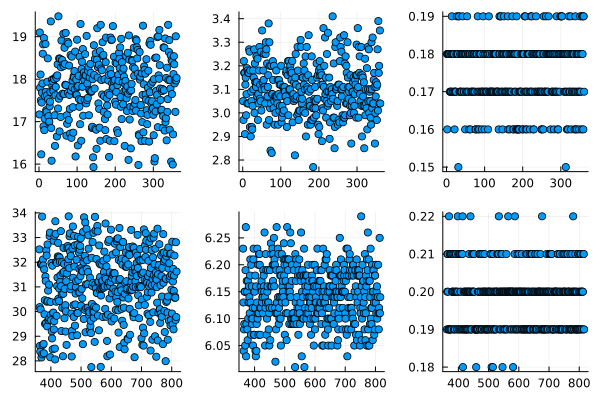

In [54]:
using StatsPlots

@df testing_set scatter(
    [:length, :weight, :w_l_ratio],
    group = :species,
    layout = (2,3),
    legend = :false,
    )

In [37]:
# Assuming the model expects Union{Missing, Float64} data type
#31.25	6.14	0.2
sample_data = [31.25,6.14, 0.2]
# Handle missing data or mismatched types
sample_data = Vector{Union{Missing, Float64}}(sample_data)

# Reshape the data to a 1xN matrix if needed
sample_matrix = reshape(sample_data, 1, :)

# Then predict
predictions = predict(model, sample_matrix)

LoadError: UndefVarError: `predict` not defined